In [1]:
# ! pip install git+https://github.com/mrjbq7/ta-lib.git

In [2]:
import pandas as pd
import bt, talib
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [3]:
plt.rcParams["figure.figsize"] = [16,9]

In [4]:
# Load the data
bitcoin_data = pd.read_csv('Bitcoin.csv', index_col='Date', parse_dates=True)

# Print the top 5 rows
print(bitcoin_data.head())

              Open    High     Low   Close     Volume
Date                                                 
2016-12-17  785.17  792.51  784.86  790.83   78989800
2016-12-18  791.01  794.74  788.03  790.53   60524400
2016-12-19  790.69  793.61  790.32  792.71   74886400
2016-12-20  792.25  801.34  791.50  800.88   99629296
2016-12-21  800.64  834.28  799.41  834.28  155576000


In [5]:
# Define the candlestick data
candlestick = go.Candlestick(
    x=bitcoin_data.index,
    open=bitcoin_data['Open'],
    high=bitcoin_data['High'],
    low=bitcoin_data['Low'],
    close=bitcoin_data['Close'])

# Create a candlestick figure ?  
fig = go.Figure(data=[candlestick])
fig.update_layout(title='Bitcoin prices')                        

# Show the plot
fig.show()

In [6]:
# Load the data
eurusd_4h = pd.read_csv('eurusd_hour.csv',  parse_dates=True)

# Print the top 5 rows
print(eurusd_4h.head())

         Date   Time      BO      BH      BL      BC     BCh      AO      AH  \
0  2005-05-02  00:00  1.2852  1.2852  1.2840  1.2844 -0.0008  1.2854  1.2854   
1  2005-05-02  01:00  1.2844  1.2848  1.2839  1.2842 -0.0002  1.2846  1.2850   
2  2005-05-02  02:00  1.2843  1.2854  1.2841  1.2851  0.0008  1.2845  1.2856   
3  2005-05-02  03:00  1.2851  1.2859  1.2850  1.2851  0.0000  1.2853  1.2861   
4  2005-05-02  04:00  1.2852  1.2859  1.2849  1.2855  0.0003  1.2854  1.2861   

       AL      AC     ACh  
0  1.2842  1.2846 -0.0008  
1  1.2841  1.2844 -0.0002  
2  1.2843  1.2853  0.0008  
3  1.2852  1.2853  0.0000  
4  1.2851  1.2857  0.0003  


In [7]:
eurusd_4h['Date_time'] = pd.to_datetime(eurusd_4h['Date'] +' ' + eurusd_4h['Time'])

In [8]:
eurusd_4h.drop(columns=['Date', 'Time'], inplace=True)

In [9]:
eurusd_4h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93084 entries, 0 to 93083
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   BO         93084 non-null  float64       
 1   BH         93084 non-null  float64       
 2   BL         93084 non-null  float64       
 3   BC         93084 non-null  float64       
 4   BCh        93084 non-null  float64       
 5   AO         93084 non-null  float64       
 6   AH         93084 non-null  float64       
 7   AL         93084 non-null  float64       
 8   AC         93084 non-null  float64       
 9   ACh        93084 non-null  float64       
 10  Date_time  93084 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(10)
memory usage: 7.8 MB


In [10]:
# Resample the data to daily by calculating the mean values
eurusd_daily = eurusd_4h.resample('D', on='Date_time').mean()

# Print the top 5 rows
print(eurusd_daily.head())

                  BO        BH        BL        BC       BCh        AO  \
Date_time                                                                
2005-05-02  1.285468  1.286136  1.284941  1.285476  0.000008  1.285678   
2005-05-03  1.286334  1.287307  1.285568  1.286427  0.000093  1.286500   
2005-05-04  1.294374  1.295348  1.293517  1.294647  0.000274  1.294528   
2005-05-05  1.295118  1.295977  1.294439  1.295139  0.000021  1.295287   
2005-05-06  1.290402  1.290939  1.289189  1.289783 -0.000619  1.290611   

                  AH        AL        AC       ACh  
Date_time                                           
2005-05-02  1.286334  1.285126  1.285687  0.000008  
2005-05-03  1.287485  1.285738  1.286591  0.000091  
2005-05-04  1.295504  1.293671  1.294804  0.000276  
2005-05-05  1.296144  1.294610  1.295308  0.000021  
2005-05-06  1.291150  1.289400  1.290030 -0.000581  


In [11]:
# Load the data
tsla_data = pd.read_csv('TSLA.csv',  parse_dates=True)

# Print the top 5 rows
print(tsla_data.head())

         Date   Open   High    Low  Close  Adj Close    Volume
0  2015-12-18  46.58  47.18  45.86  46.09      46.09  15071000
1  2015-12-21  46.34  47.17  46.22  46.51      46.51   9766000
2  2015-12-22  47.00  47.31  45.93  45.99      45.99   9807500
3  2015-12-23  46.44  46.69  45.63  45.94      45.94   7775000
4  2015-12-24  46.11  46.38  45.66  46.11      46.11   3540000


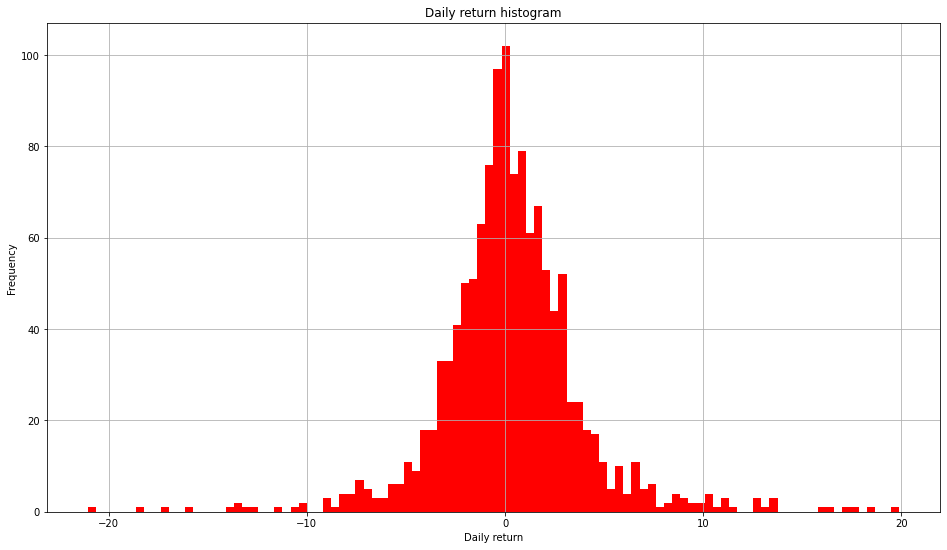

In [12]:
# Calculate daily returns
tsla_data['daily_return'] = tsla_data['Close'].pct_change() * 100

# Plot the histogram
tsla_data['daily_return'].hist(bins=100, color='red')
plt.ylabel('Frequency')
plt.xlabel('Daily return')
plt.title('Daily return histogram')
plt.show()

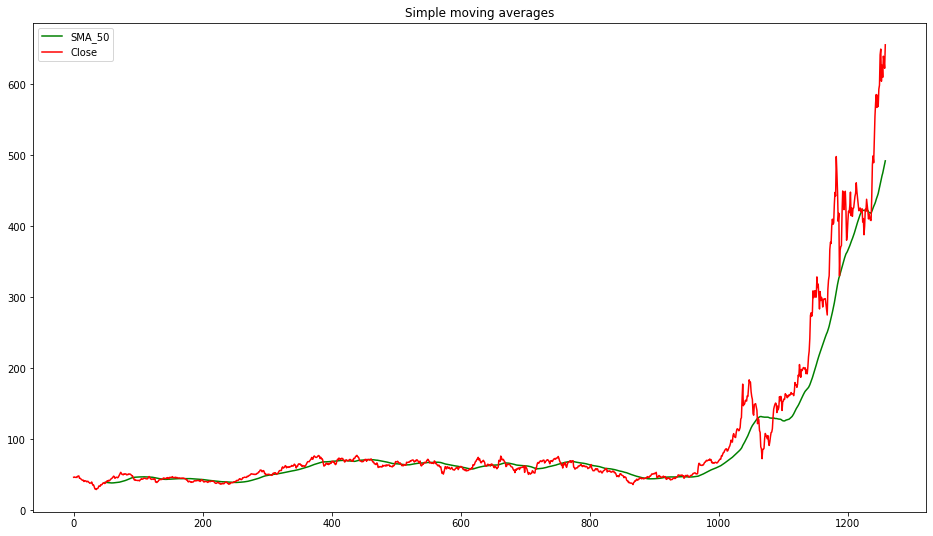

In [13]:
# Calculate SMA
tsla_data['sma_50'] = tsla_data['Close'].rolling(50).mean()

# Plot the SMA
plt.plot(tsla_data['sma_50'], color='green', label='SMA_50')
# Plot the close price
plt.plot(tsla_data['Close'], color='red', label='Close')

# Customize and show the plot
plt.title('Simple moving averages')
plt.legend()
plt.show()

In [14]:
# !pip install bt

# Using bt package to backtest trading startegies

# get data

In [15]:
# Download historical prices
bt_data = bt.get('fb, amzn, goog, nflx, aapl',
               start='2020-6-1', end='2020-12-1')
# Print the top five rows
print(bt_data.head())

                    fb         amzn         goog        nflx       aapl
Date                                                                   
2020-06-01  231.910004  2471.040039  1431.819946  425.920013  80.059723
2020-06-02  232.720001  2472.409912  1439.219971  427.309998  80.430351
2020-06-03  230.160004  2478.399902  1436.380005  421.970001  80.873131
2020-06-04  226.289993  2460.600098  1412.180054  414.329987  80.176636
2020-06-05  230.770004  2483.000000  1438.390015  419.600006  82.460152


# create strategy

In [16]:
bt_strategy = bt.Strategy('Weekly_strategy',
                         [
                             bt.algos.RunWeekly(),
                             bt.algos.SelectAll(),
                             bt.algos.WeighEqually(),
                             bt.algos.Rebalance(),
                         ])

# create backtest

In [17]:
bt_test = bt.Backtest(bt_strategy, bt_data)

bt_res = bt.run(bt_test)

Weekly_strategy
0% [############################# ] 100% | ETA: 00:00:00

# evaluate strategy

<AxesSubplot:title={'center':'Backtest results'}>

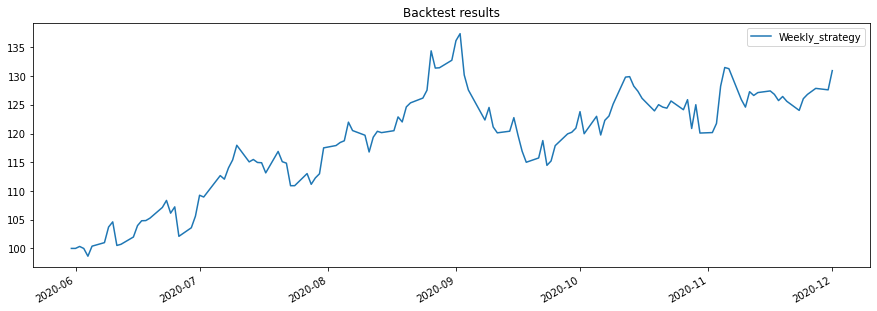

In [18]:
bt_res.plot(title='Backtest results')

In [19]:
bt_res.get_transactions()

price  quantity
Date       Security                       
2020-06-01 aapl        80.059723    2498.0
           amzn      2471.040039      80.0
           fb         231.910004     862.0
           goog      1431.819946     139.0
           nflx       425.920013     469.0
...                          ...       ...
2020-11-23 goog      1734.859985      -1.0
           nflx       476.619995     -11.0
2020-11-30 aapl       118.872368     -35.0
           fb         276.970001      -3.0
           goog      1760.739990       2.0

[125 rows x 2 columns]

# calculating Techincal Inidcators (TAs)

In [20]:
stock_data = tsla_data.copy()

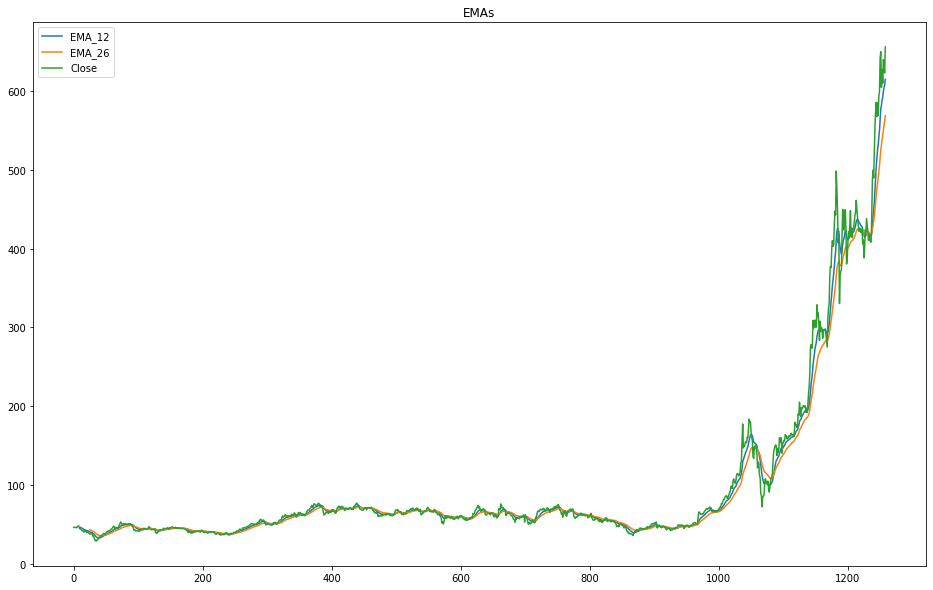

In [21]:
# Calculate 12-day EMA
stock_data['EMA_12'] = talib.EMA(stock_data['Close'], timeperiod=12)
# Calculate 26-day EMA
stock_data['EMA_26'] = talib.EMA(stock_data['Close'], timeperiod=26)

# Plot the EMAs with price
plt.figure(figsize=(16,10))
plt.plot(stock_data['EMA_12'], label='EMA_12')
plt.plot(stock_data['EMA_26'], label='EMA_26')
plt.plot(stock_data['Close'], label='Close')

# Customize and show the plot
plt.legend()
plt.title('EMAs')
plt.show()

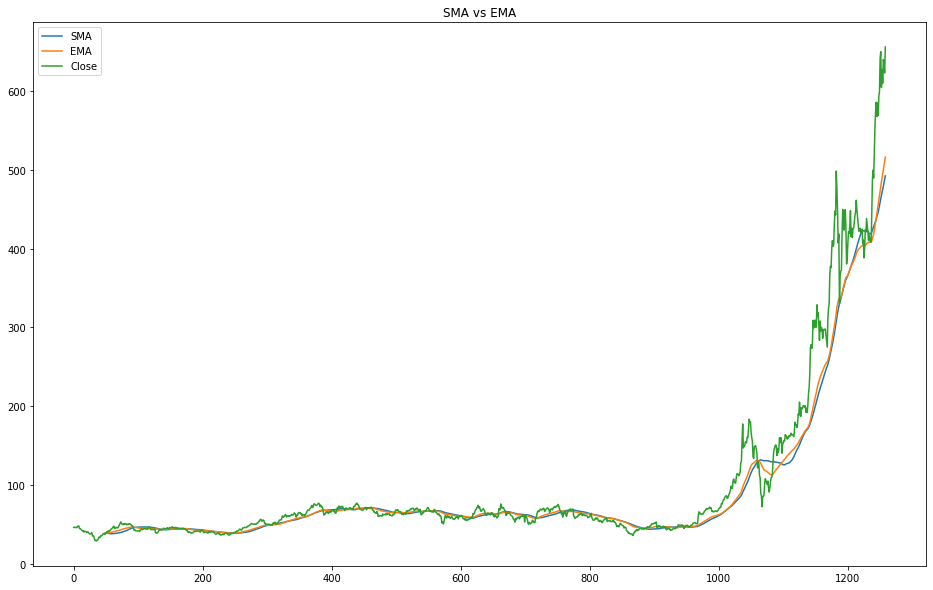

In [22]:
# Calculate the SMA
stock_data['SMA'] = talib.SMA(stock_data['Close'], timeperiod=50)
# Calculate the EMA
stock_data['EMA'] = talib.EMA(stock_data['Close'], timeperiod=50)

# Plot the SMA, EMA with price
plt.figure(figsize=(16,10))
plt.plot(stock_data['SMA'], label='SMA')
plt.plot(stock_data['EMA'], label='EMA')
plt.plot(stock_data['Close'], label='Close')

# Customize and show the plot
plt.legend()
plt.title('SMA vs EMA')
plt.show()

# strength indicators

In [23]:
# Calculate the ADX with the default time period
stock_data['ADX_14'] = talib.ADX(stock_data['Low'],
                            stock_data['High'], 
                            stock_data['Close'])

# Calculate the ADX with the time period set to 21
stock_data['ADX_21'] = talib.ADX(stock_data['Low'],
                            stock_data['High'], 
                            stock_data['Close'], timeperiod=21)

# Print the last five rows
print(stock_data.tail())

            Date    Open    High    Low   Close  Adj Close    Volume  \
1254  2020-12-11  615.01  624.00  596.8  609.99     609.99  46475000   
1255  2020-12-14  619.00  642.75  610.2  639.83     639.83  52040600   
1256  2020-12-15  643.28  646.90  623.8  633.25     633.25  45223600   
1257  2020-12-16  628.23  632.50  605.0  622.77     622.77  42095800   
1258  2020-12-17  628.19  658.82  619.5  655.90     655.90  56038300   

      daily_return    sma_50      EMA_12      EMA_26       SMA         EMA  \
1254     -2.723779  474.8376  591.841459  543.445891  474.8376  494.821094   
1255      4.891883  479.3324  599.224312  550.585455  479.3324  500.507718   
1256     -1.028398  483.4838  604.459033  556.708754  483.4838  505.713297   
1257     -1.654955  487.6596  607.276105  561.602180  487.6596  510.303756   
1258      5.319781  492.2716  614.756704  568.587204  492.2716  516.013413   

         ADX_14     ADX_21  
1254  39.084818  28.253103  
1255  39.957001  29.117919  
1256  40.97

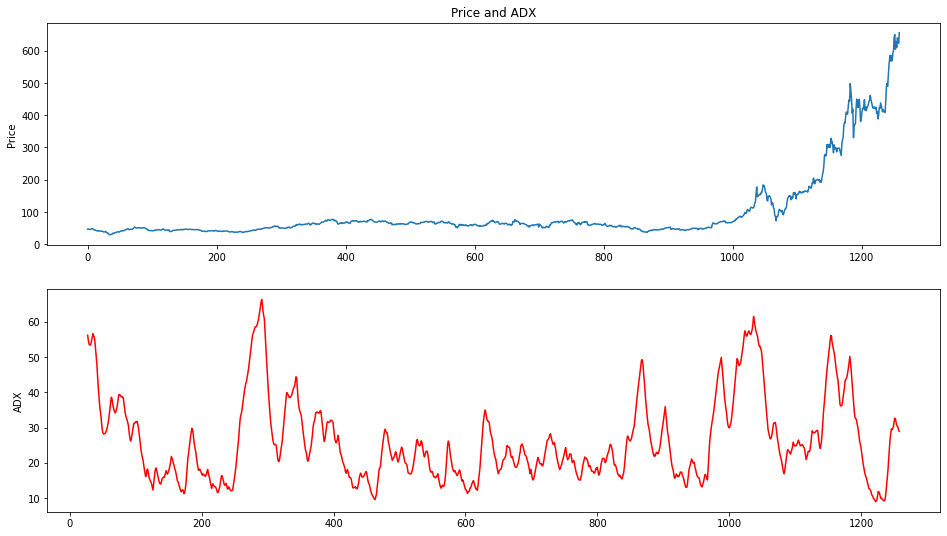

In [24]:
# Calculate ADX
stock_data['ADX'] = talib.ADX(stock_data['High'], stock_data['Low'], stock_data['Close'])

# Create subplots
fig, (ax1, ax2) = plt.subplots(2)

# plot ADX with the price
ax1.set_ylabel('Price')
ax1.plot(stock_data['Close'])
ax2.set_ylabel('ADX')
ax2.plot(stock_data['ADX'], color='red')

ax1.set_title('Price and ADX')
plt.show()

# momentun indicators

In [25]:
# Calculate RSI with the default time period
stock_data['RSI_14'] = talib.RSI(stock_data['Close'])

# Calculate RSI with a time period of 21
stock_data['RSI_21'] = talib.RSI(stock_data['Close'], timeperiod=21)

# Print the last five rows
print(stock_data.tail())

            Date    Open    High    Low   Close  Adj Close    Volume  \
1254  2020-12-11  615.01  624.00  596.8  609.99     609.99  46475000   
1255  2020-12-14  619.00  642.75  610.2  639.83     639.83  52040600   
1256  2020-12-15  643.28  646.90  623.8  633.25     633.25  45223600   
1257  2020-12-16  628.23  632.50  605.0  622.77     622.77  42095800   
1258  2020-12-17  628.19  658.82  619.5  655.90     655.90  56038300   

      daily_return    sma_50      EMA_12      EMA_26       SMA         EMA  \
1254     -2.723779  474.8376  591.841459  543.445891  474.8376  494.821094   
1255      4.891883  479.3324  599.224312  550.585455  479.3324  500.507718   
1256     -1.028398  483.4838  604.459033  556.708754  483.4838  505.713297   
1257     -1.654955  487.6596  607.276105  561.602180  487.6596  510.303756   
1258      5.319781  492.2716  614.756704  568.587204  492.2716  516.013413   

         ADX_14     ADX_21        ADX     RSI_14     RSI_21  
1254  39.084818  28.253103  30.70811

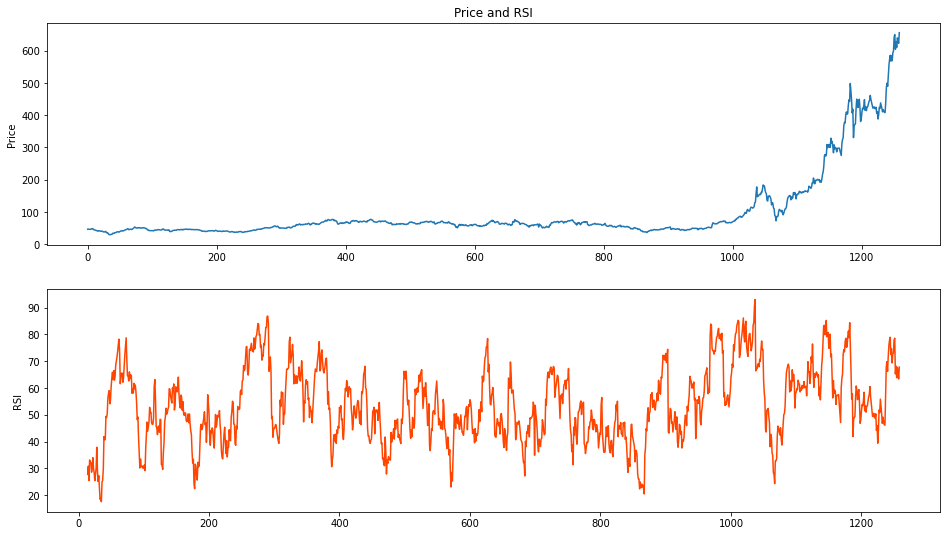

In [26]:
# Calculate RSI
stock_data['RSI'] = talib.RSI(stock_data['Close'])

# Create subplots
fig, (ax1, ax2) = plt.subplots(2)

# plot RSI with the price
ax1.set_ylabel('Price')
ax1.plot(stock_data['Close'])
ax2.set_ylabel('RSI')
ax2.plot(stock_data['RSI'], color='orangered')

ax1.set_title('Price and RSI')
plt.show()

# volatility indicators

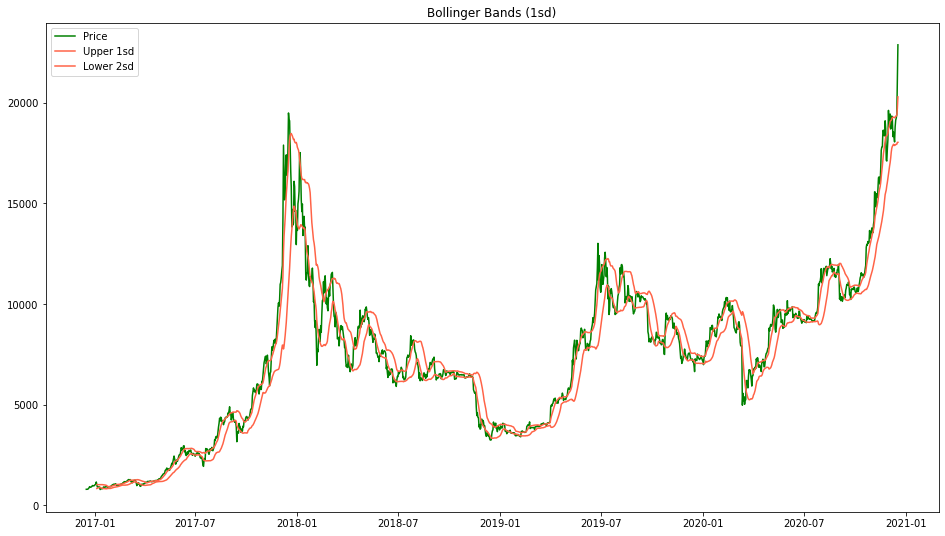

In [27]:
# Define the Bollinger Bands with 1-sd
upper_1sd, mid_1sd, lower_1sd = talib.BBANDS(bitcoin_data['Close'], 
                                     nbdevup=1 ,
                                     nbdevdn=1,
                                     timeperiod=20)
# Plot the upper and lower Bollinger Bands 
plt.plot(bitcoin_data['Close'], color='green', label='Price')
plt.plot(upper_1sd, color='tomato', label="Upper 1sd")
plt.plot(lower_1sd, color='tomato', label='Lower 2sd')

# Customize and show the plot
plt.legend(loc='upper left')
plt.title('Bollinger Bands (1sd)')
plt.show()

# Trading Strategies

## Trend following

In [28]:
# Get the price data
price_data = bt.get('aapl', start='2019-11-1', end='2020-12-1')
# Calculate the SMA
sma = price_data.rolling(20).mean()

In [29]:
price_data.head()

aapl
Date                 
2019-11-01  63.123295
2019-11-04  63.537827
2019-11-05  63.446533
2019-11-06  63.473675
2019-11-07  64.206245

In [30]:
# Calculate the EMA
ema = talib.EMA(price_data['aapl'], timeperiod=20)

In [31]:
ema

Date
2019-11-01           NaN
2019-11-04           NaN
2019-11-05           NaN
2019-11-06           NaN
2019-11-07           NaN
                 ...    
2020-11-24    116.533034
2020-11-25    116.468637
2020-11-27    116.463627
2020-11-30    116.693031
2020-12-01    117.249590
Length: 273, dtype: float64

In [32]:
# Calculate short and long EMA 
EMA_short = talib.EMA(price_data['aapl'], timeperiod=5)
EMA_long = talib.EMA(price_data['aapl'], timeperiod=40)

In [33]:
signal = pd.Series(index=price_data.index)

/home/davo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [34]:
# Construct the signal
signal[EMA_short > EMA_long] = 1
signal[EMA_short < EMA_long] = -1

In [35]:
signal = signal.fillna(0)

In [36]:
signal = pd.DataFrame(signal).rename(columns = {0: 'aapl'})

In [37]:
bt_strategy = bt.Strategy('EMA_Crossover',
                         [bt.algos.WeighTarget(pd.DataFrame(signal)),
                         bt.algos.Rebalance()])

In [38]:
bt_backtest = bt.Backtest(bt_strategy, price_data)

In [39]:
bt_res = bt.run(bt_backtest)

EMA_Crossover
0% [############################# ] 100% | ETA: 00:00:00

<AxesSubplot:title={'center':'Equity Progression'}>

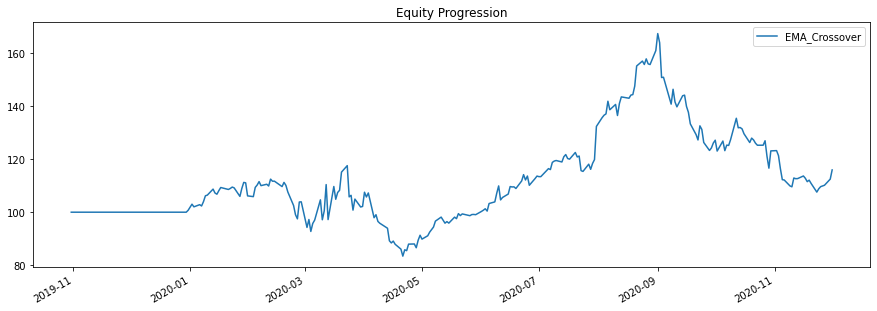

In [40]:
bt_res.plot()

In [41]:
combined_df = bt.merge(signal, EMA_long, EMA_short, price_data)

In [42]:
combined_df.columns = ['Signal', 'EMA_long', 'EMA_short', 'Price']

<AxesSubplot:xlabel='Date'>

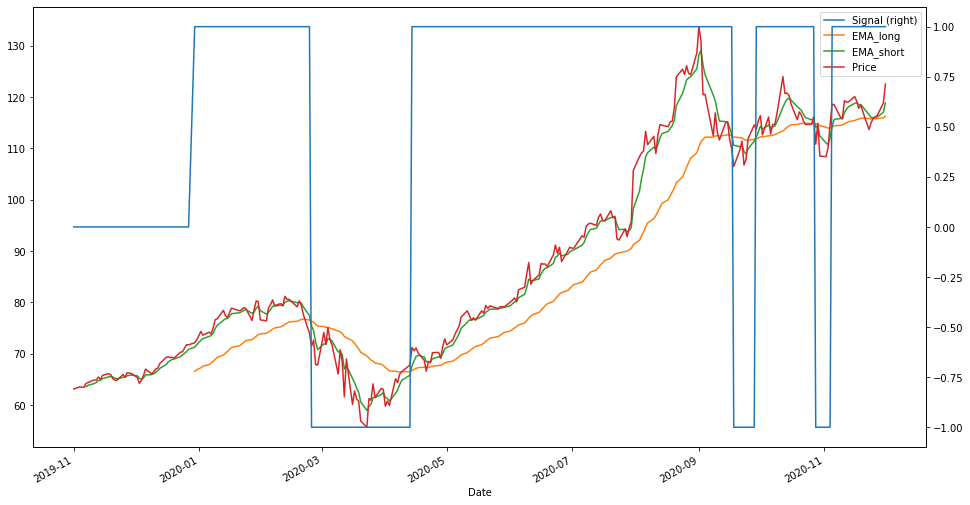

In [43]:
combined_df.plot(secondary_y=['Signal'])

## Mean reversion

In [44]:
stock_rsi = talib.RSI(price_data['aapl'])

In [45]:
signal = pd.Series(index=price_data.index)

/home/davo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [46]:
# Construct the signal
signal[stock_rsi > 70] = -1
signal[stock_rsi < 30] = 1
signal[(stock_rsi <= 70) & (stock_rsi >= 30)] = 0

In [47]:
signal = pd.DataFrame(signal).rename(columns = {0: 'aapl'})

In [48]:
# Define the strategy
bt_strategy = bt.Strategy('RSI_MeanReversion', 
                          [bt.algos.WeighTarget(signal),
                           bt.algos.Rebalance()])

In [49]:
bt_backtest = bt.Backtest(bt_strategy, price_data)

In [50]:
bt_res = bt.run(bt_backtest)

RSI_MeanReversion
0% [############################# ] 100% | ETA: 00:00:00

<AxesSubplot:title={'center':'Equity Progression'}>

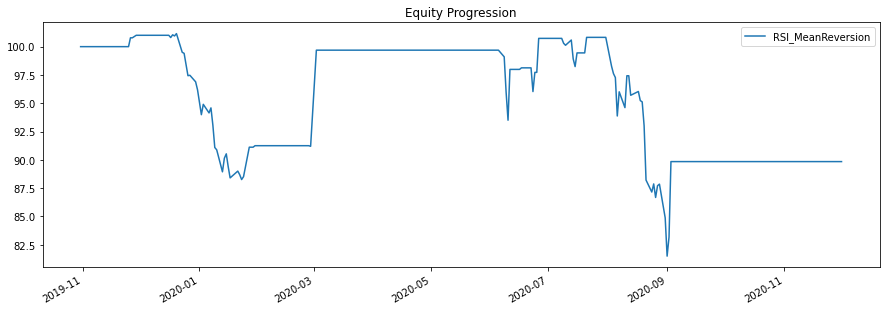

In [51]:
bt_res.plot()

<AxesSubplot:xlabel='Date'>

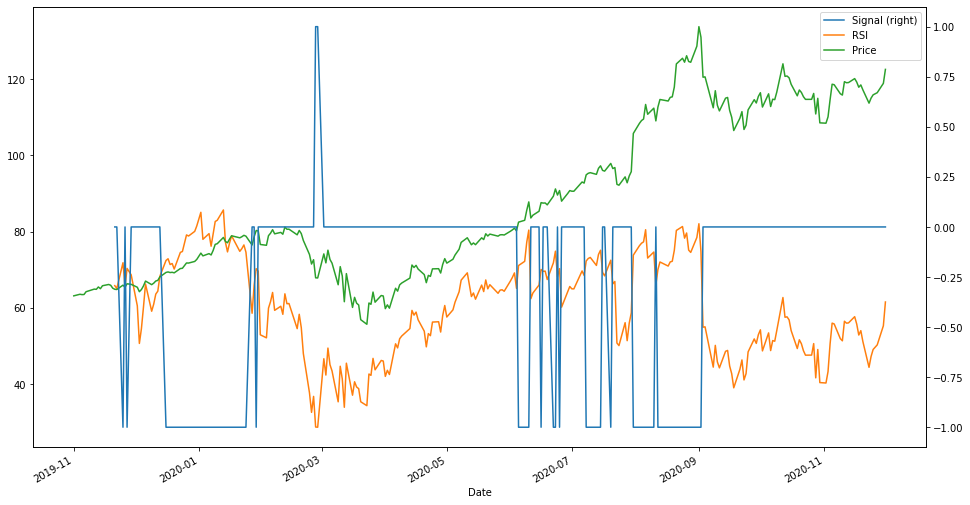

In [52]:
combined_df = bt.merge(signal, stock_rsi, price_data)
combined_df.columns = ['Signal', 'RSI', 'Price']
combined_df.plot(secondary_y=['Signal'])

# Evaluation

In [54]:
bt_result = bt_res

In [55]:
# Obtain all backtest stats
resInfo = bt_result.stats

# Get daily, monthly, and yearly returns
print('Daily return: %.4f'% resInfo.loc['daily_mean'])
print('Monthly return: %.4f'% resInfo.loc['monthly_mean'])
print('Yearly return: %.4f'% resInfo.loc['yearly_mean'])

# Get the compound annual growth rate
print('Compound annual growth rate: %.4f'% resInfo.loc['cagr'])

Daily return: -0.0823
Monthly return: -0.0726
Yearly return: -0.0659
Compound annual growth rate: -0.0938


<Figure size 1152x648 with 0 Axes>

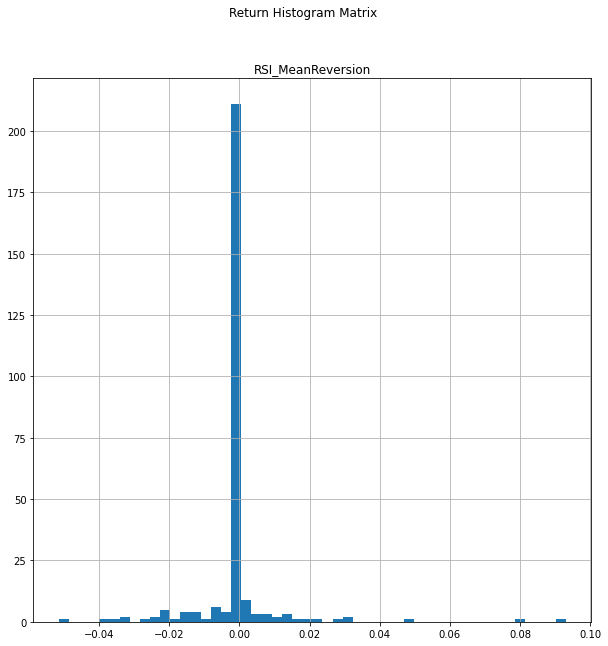

In [56]:
# Plot the daily return histogram
bt_result.plot_histograms(bins=50)
plt.show()

<Figure size 1152x648 with 0 Axes>

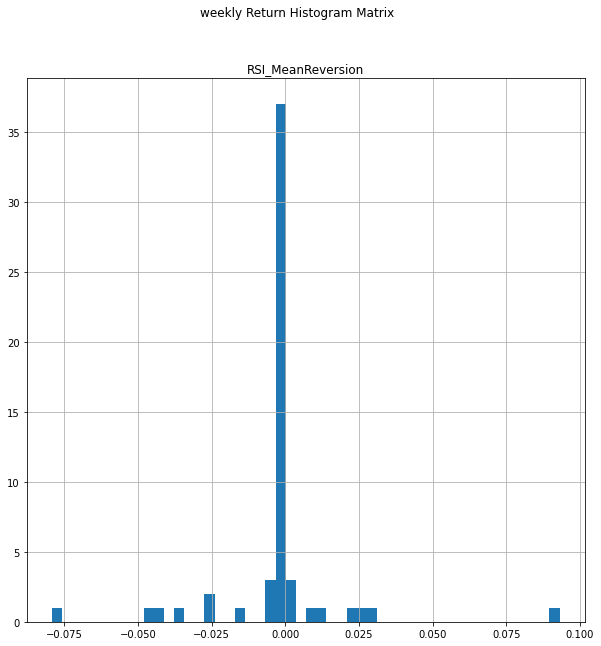

In [57]:
# Plot the weekly return histogram
bt_result.plot_histograms(bins=50, freq='w')
plt.show()

In [59]:
# # Plot the backtest result
# bt_results.plot(title='Backtest result')
# plt.show()

# # Get the lookback returns
# lookback_returns = bt_results.display_lookback_returns()
# print(lookback_returns)

In [60]:
# Obtain all backtest stats
resInfo = bt_result.stats

# Get the average drawdown
avg_drawdown = resInfo.loc['avg_drawdown']
print('Average drawdown: %.2f'% avg_drawdown)

# Get the average drawdown days
avg_drawdown_days = resInfo.loc['avg_drawdown_days']
print('Average drawdown days: %.0f'% avg_drawdown_days)

Average drawdown: -0.07
Average drawdown days: 115


In [61]:
# Get the CAGR
cagr = resInfo.loc['cagr']
print('Compound annual growth rate: %.4f'% cagr)

# Get the max drawdown
max_drawdown = resInfo.loc['max_drawdown']
print('Maximum drawdown: %.2f'% max_drawdown)

# Calculate Calmar ratio manually
calmar_calc = cagr / max_drawdown * (-1)
print('Calmar Ratio calculated: %.2f'% calmar_calc)

# Get the Calmar ratio
calmar = resInfo.loc['calmar']
print('Calmar Ratio: %.2f'% calmar)

Compound annual growth rate: -0.0938
Maximum drawdown: -0.19
Calmar Ratio calculated: -0.48
Calmar Ratio: -0.48


In [62]:
# Get annual return and volatility
yearly_return = resInfo.loc['yearly_mean']
print('Annual return: %.2f'% yearly_return)
yearly_vol = resInfo.loc['yearly_vol']
print('Annual volatility: %.2f'% yearly_vol)

# Calculate the Sharpe ratio manually
sharpe_ratio = yearly_return / yearly_vol
print('Sharpe ratio calculated: %.2f'% sharpe_ratio)

# Print the Sharpe ratio
print('Sharpe ratio %.2f'% resInfo.loc['yearly_sharpe'])

Annual return: -0.07
Annual volatility: nan
Sharpe ratio calculated: nan
Sharpe ratio nan


In [63]:
# Print annual Sortino ratio
yearly_sortino = resInfo.loc['yearly_sortino']
print('Annual Sortino ratio: %.2f'% yearly_sortino)

# Print monthly Sortino ratio
monthly_sortino = resInfo.loc['monthly_sortino']
print('Monthly Sortino ratio %.2f'% monthly_sortino)

Annual Sortino ratio: nan
Monthly Sortino ratio -0.48
